# Big Mart Sales Analysis

### Problem Statement:-
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Dataset description
The dataset has 8524 entries with 13 columns.The description of each columns is given below:

* Item_Identifier - Unique product id.
* Item _Weight - Weight of product
* Item_Fat_Content
* Item_Visibility
* Item_Type
* Item_MRP
* Outlet_identifier
* Outlet_Establishment_Year
* Outlet_size
* Outlet_Type
* Outlet_Location_type
* Item_outlet sales

#### Importing the required libraries and reading the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv(r'C:\Users\shubh\Downloads\datasets\Big_mart.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Checking for the shape and info of the data

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


#### Checking for the count of values in all the categorical columns and cleaning the data

In [6]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [8]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [9]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### We see that the values in the column `Item_Fat_Content` are miscoded, so we fix them.

In [10]:
def LF_reg(x):
    return x.map({'LF':'Low Fat', 'reg':'Regular','Low Fat':'Low Fat','low fat':'Low Fat', 'Regular':'Regular'})

df[['Item_Fat_Content']]= df[['Item_Fat_Content']].apply(LF_reg)

In [11]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

#### Checking for the null values in each column

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# Checking if any row has all the values as null
df.isnull().all(axis=1).sum()

0

In [15]:
# Checking for the percentage of null values in each of the column
(round(100*(df.isnull().sum()/len(df.index)), 2))

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [16]:
# Checking the mean, median and percentiles of the column `Item_Weight` to fix the missing values.
df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

Since we see that the data has been evenly distributed with equal interval between the min, 25%, median, 75% and max.
We also see that there is not much of a difference between the mean and the median.

In [17]:
#Fill missing values of weight of Item by the mean of Item_Weight
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Item_Identifier               0.00
Item_Weight                   0.00
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64


In [18]:
#filling the missing value of Outlet_Size.
#Hypothesis: Outlet_Size depends on Oulet Type and Outlet__Location_Type
Two_way_table = pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
Two_way_table


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [19]:
#From above table we can assume that Grocery stores are of small size.
#So we replace the null values in Grocery store by the above result.

In [20]:
d = {'Grocery Store':'Small'}
d_1 = df.Outlet_Type.map(d)
df.Outlet_Size = df.Outlet_Size.combine_first(d_1)

In [21]:
Two_way_table = pd.crosstab(df['Outlet_Size'],df['Outlet_Location_Type'])
Two_way_table

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


In [22]:
#From table we conclude that Tier 2 is of size small .
#So map Tier 2 and Size

d = {'Tier 2':'Small'}
d_2 = df.Outlet_Location_Type.map(d)
df.Outlet_Size = df.Outlet_Size.combine_first(d_2)


In [23]:
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [24]:
#Checking for % of null values in each column
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64


In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We see that `Item_Visibility` has a minimum of `0` which cannot be true, so we 

In [26]:
#First we replace the item visibility of 0 by nan and then fill the null values by its mean.
df['Item_Visibility'].replace(0,np.NaN,inplace=True)
df['Item_Visibility']=df['Item_Visibility'].fillna(df['Item_Visibility'].mean())

##### Now that we have cleaned our data and fixed the null values we can go ahead and derive few metrics from the given data.


In [27]:
#no of years outlet has been in business
df['Outlet_Years']=2013-df['Outlet_Establishment_Year']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [28]:
# dropping columns `Outlet_Establishment_Year`, 
# since these are not required for our sales prediction purpose

df= df.drop(columns =['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


### Visualising the Data

Let's now spend some time in understanding the data.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable (price in our case)

We'll visualise our data using `matplotlib` and `seaborn`.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

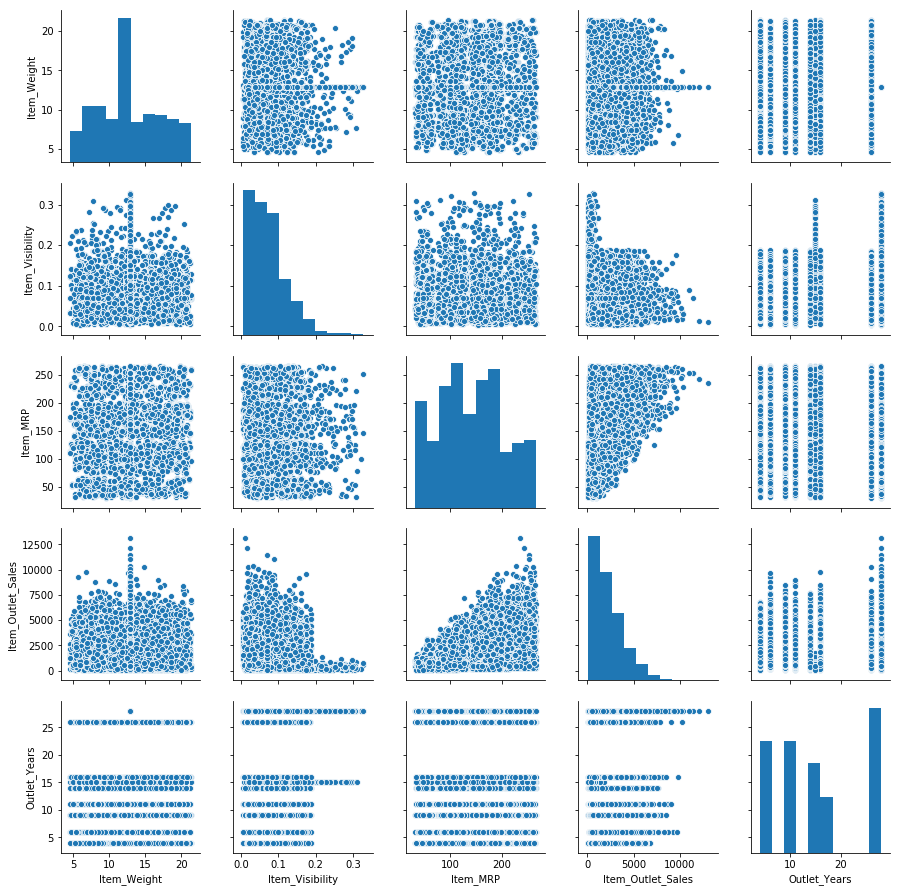

In [30]:
sns.pairplot(df)
plt.show()

Using the pairplot we can see only the correlation between the `Item_sales` and the `Item_Visibility` and `Item_MRP`.

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables

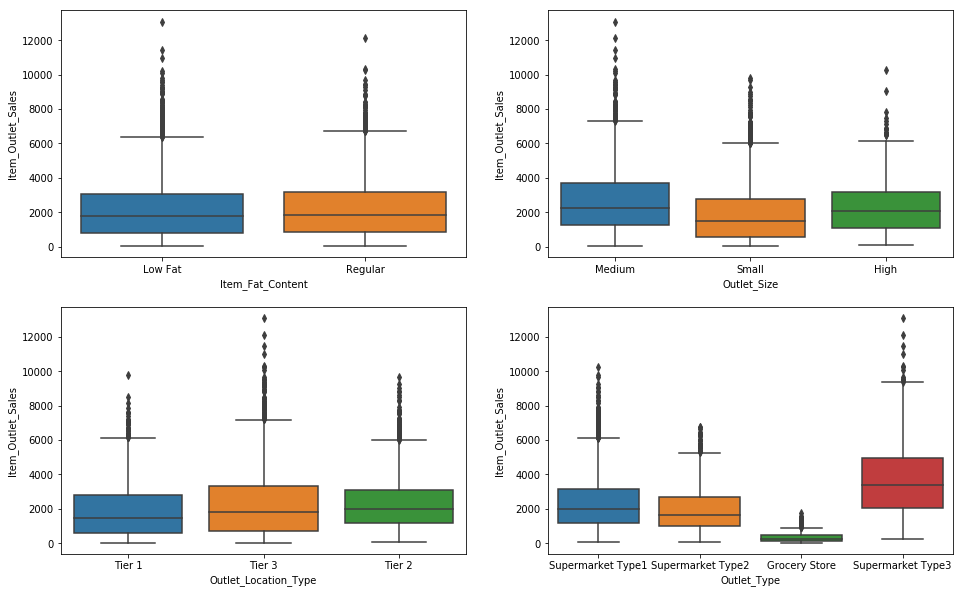

In [31]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

plt.subplot(2,2,3)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

plt.subplot(2,2,4)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)
plt.show()

From the above boxplots: 
* We see that the median sales for `Grocery store` is much less compared to others while it is highest for `Supermarket Type3`
* We also see that the median sales for `Small` outlet size is much less compared to others.
* There is no difference in the median outlet sales for `Item_Fat_Content`.

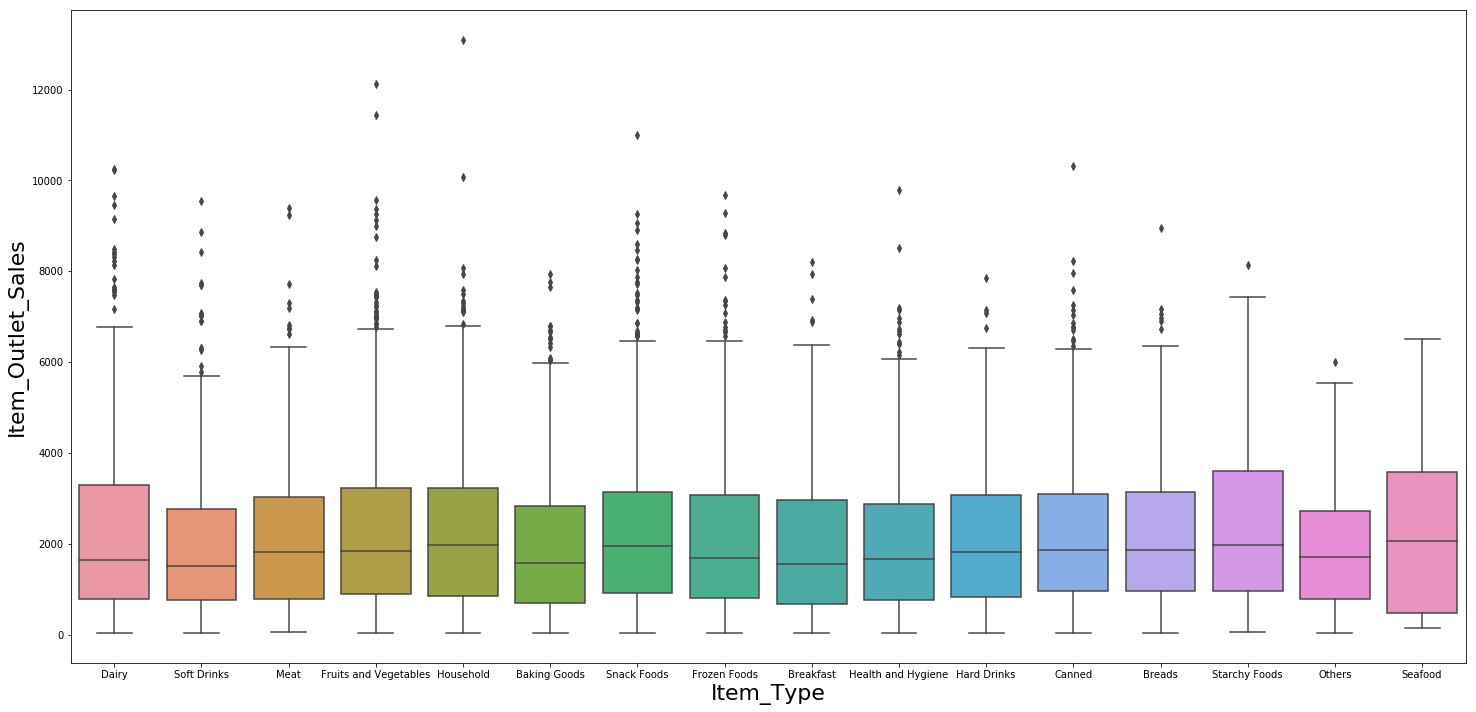

In [32]:
# Now we will plot a boxplot for different item type

plt.figure(figsize=(25,12))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales', data=df)
plt.xlabel('Item_Type', fontsize=22)
plt.ylabel('Item_Outlet_Sales',fontsize=22 )
plt.show()

There is not much significant difference between the median of item outlet sales for different item type

We can also visualise some of these categorical features parallely by using the `hue` argument.Below is the plot for `Outlet_Type` with `Outlet_Location_Type`, `Outlet_Size`, `Item_Fat_Content`, as the hue.

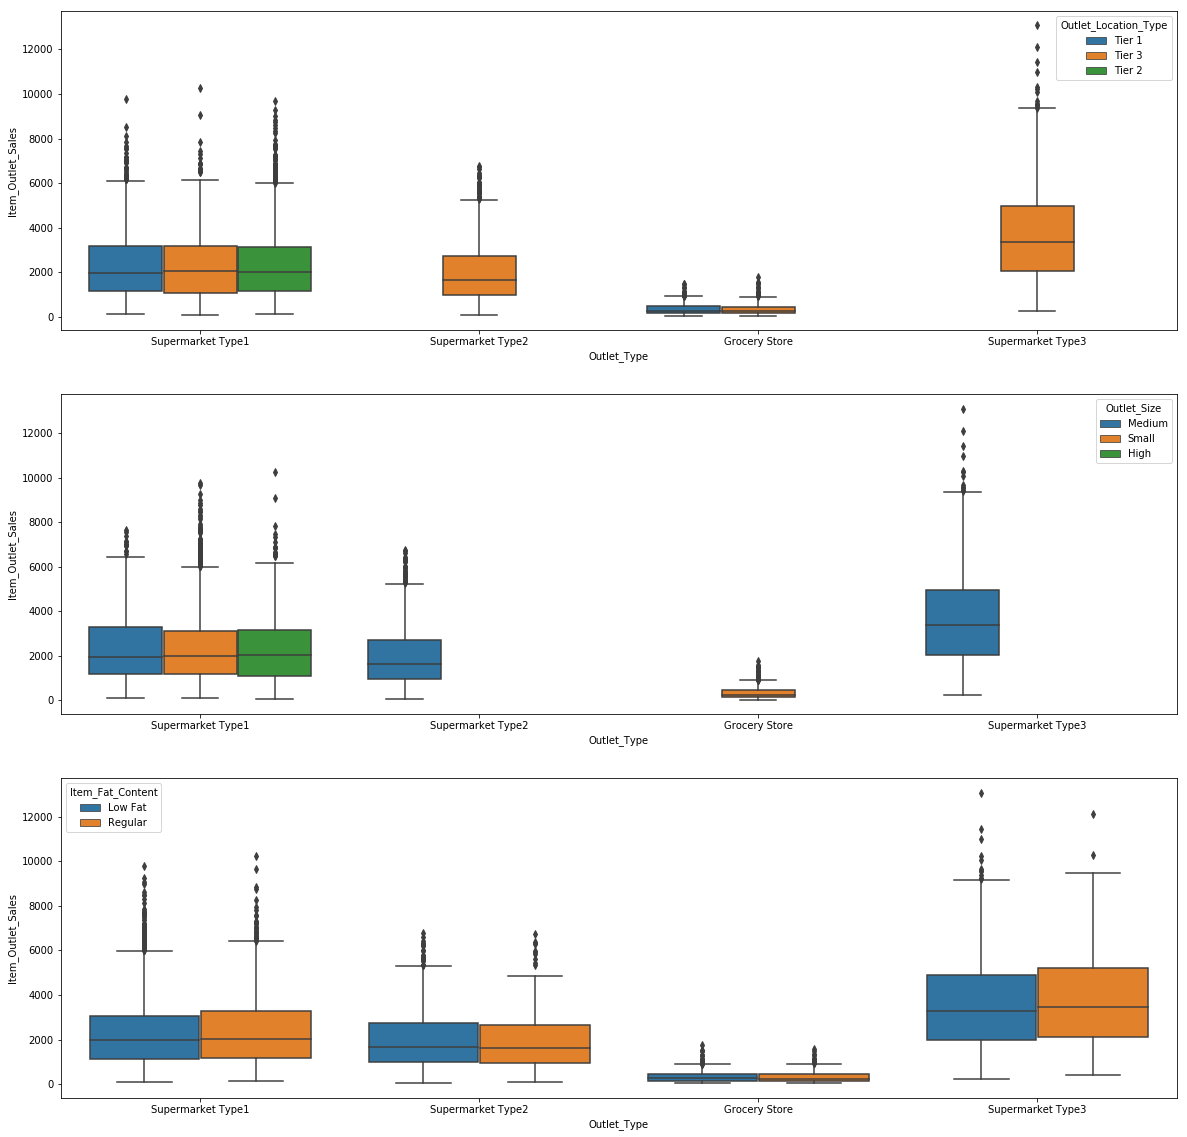

In [33]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=df)

plt.subplot(3,1,2)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=df)

plt.subplot(3,1,3)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=df)
plt.show()

###  Data Preparation

I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier using a labelencoder to convert this kind of categorical text data into model-understandable numerical data.

In [34]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

For our ease we have categorized differnt `Item_Type` into 3 categories using the `Item_Identifier`, as the first 2 alphabets tell us about the category of the item.   

In [35]:
#Getting the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

### Dummy Variables

In [36]:
df = pd.get_dummies(data=df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'], drop_first= True)

In [37]:
pd.set_option('display.max_columns',500)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,3735.1380,14,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,443.4228,4,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,2097.2700,14,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.070482,Fruits and Vegetables,182.0950,OUT010,732.3800,15,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.070482,Household,53.8614,OUT013,994.7052,26,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [38]:
# dropping those columnns which we dont require for our model building.
df.drop(columns=['Item_Type','Item_Identifier','Outlet_Identifier'], inplace=True)


In [39]:
pd.set_option('display.max_columns',500)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,14,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,4,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,14,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,19.20,0.070482,182.0950,732.3800,15,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8.93,0.070482,53.8614,994.7052,26,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


##### Now we have processed our data we can move ahead to build a linear model for predicting the sales.

### Splitting the Data into Training and Testing Sets

In [40]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100) 

### Rescaling the Features
We will use `MinMax` scaling as you see that there is huge amount of difference between the `Item_Visibility`,`Item_Weight` and `Item_MRP`, so in order to interpret our model easily we scale them down. `MinMaxScaler` brings every thing down to the range of 0 to 1.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

In [42]:
list_1 =['Item_Weight','Item_Visibility','Item_MRP','Outlet_Years', 'Item_Outlet_Sales']

df_train[list_1]= scaler.fit_transform(df_train[list_1])

df_train.head()

C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shubh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = 

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
4122,0.082763,0.282157,0.407289,0.116189,0.416667,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
6590,0.088121,0.433217,0.525109,0.280220,0.916667,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
5460,0.494352,0.142991,0.497943,0.226971,1.000000,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4541,0.443287,0.227142,0.395707,0.158727,0.291667,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4186,0.359929,0.099745,0.226137,0.121493,0.416667,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [43]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000
mean,0.493733,0.210841,0.464598,0.164563,0.469207,0.358532,0.325846,0.391217,0.327187,0.565706,0.653201,0.104425,0.113141,0.718404,0.191418,0.107107,0.107610,0.104425,0.062689,0.113141,0.106939,0.111297,0.110627,0.109621
std,0.251101,0.151910,0.265584,0.131455,0.348163,0.479609,0.468730,0.488064,0.469226,0.495706,0.475991,0.305837,0.316792,0.449815,0.393450,0.309275,0.309913,0.305837,0.242422,0.316792,0.309062,0.314526,0.313696,0.312443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288181,0.095354,0.264047,0.060288,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494352,0.187256,0.472566,0.133837,0.416667,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.681453,0.286802,0.654788,0.236803,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


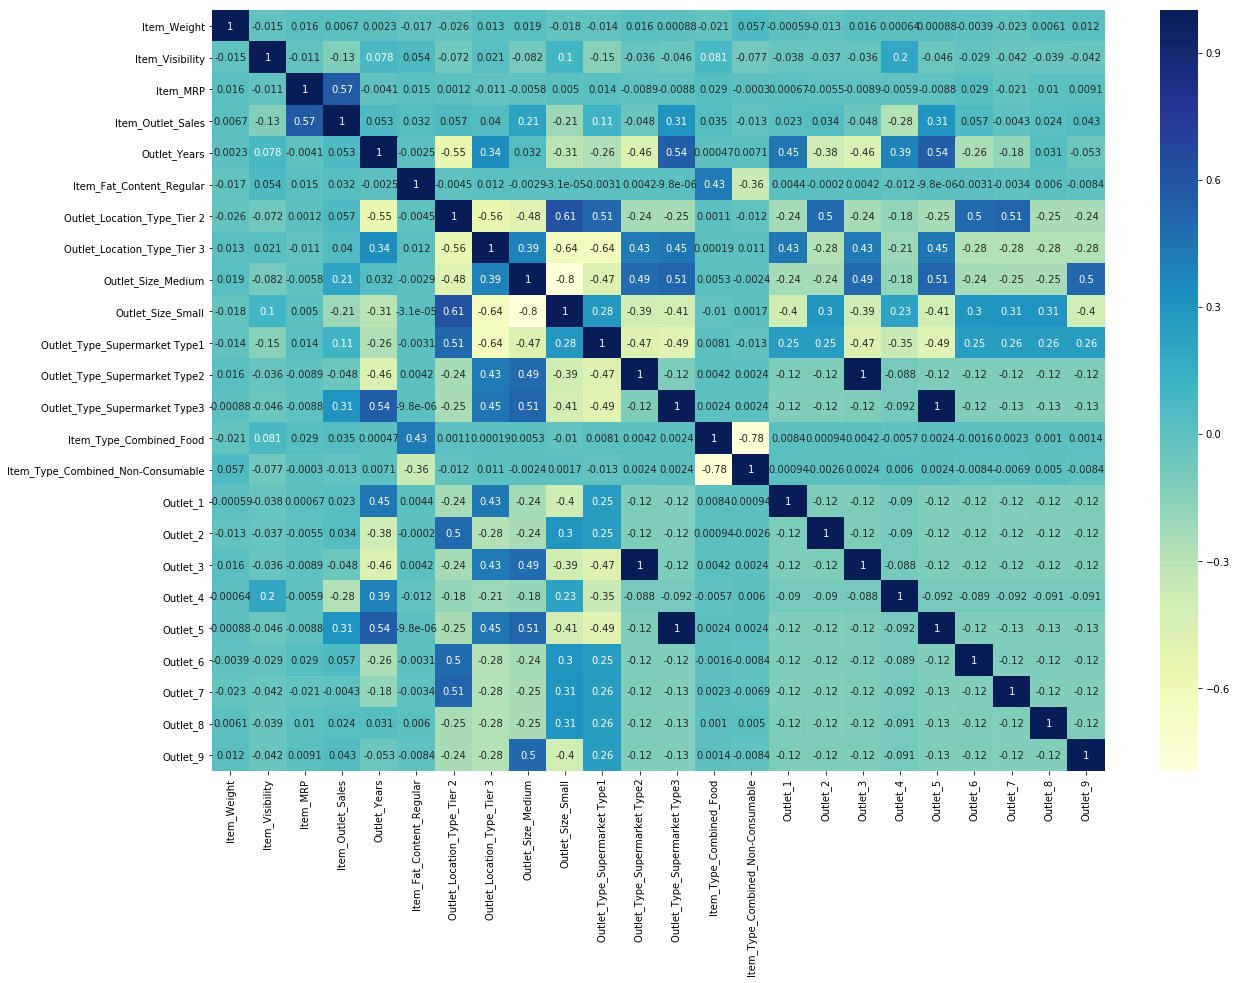

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 14))
sns.heatmap(df_train.corr(), annot= True,cmap="YlGnBu")
plt.show()

* As you might have noticed, `Item_outlet_Sales` seems to the correlated to `Item_MRP` the most.

* We also notice that `Outlet_3` and `Outlet_5` has perfect correlation with `Outlet_Type_Supermarket Type2` and `Outlet_Type_Supermarket Type3` respectively

### Dividing into X and Y sets for the model building


In [45]:
y_train= df_train.pop('Item_Outlet_Sales')
X_train= df_train

### Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE.

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
lm= LinearRegression()
lm.fit(X_train, y_train)

rfe= RFE(lm,15)
rfe= rfe.fit(X_train,y_train)

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Item_Weight', False, 9),
 ('Item_Visibility', False, 5),
 ('Item_MRP', True, 1),
 ('Outlet_Years', True, 1),
 ('Item_Fat_Content_Regular', False, 4),
 ('Outlet_Location_Type_Tier 2', False, 2),
 ('Outlet_Location_Type_Tier 3', True, 1),
 ('Outlet_Size_Medium', True, 1),
 ('Outlet_Size_Small', True, 1),
 ('Outlet_Type_Supermarket Type1', True, 1),
 ('Outlet_Type_Supermarket Type2', True, 1),
 ('Outlet_Type_Supermarket Type3', True, 1),
 ('Item_Type_Combined_Food', False, 8),
 ('Item_Type_Combined_Non-Consumable', False, 7),
 ('Outlet_1', True, 1),
 ('Outlet_2', True, 1),
 ('Outlet_3', True, 1),
 ('Outlet_4', True, 1),
 ('Outlet_5', True, 1),
 ('Outlet_6', False, 3),
 ('Outlet_7', False, 6),
 ('Outlet_8', True, 1),
 ('Outlet_9', True, 1)]

In [49]:
col= X_train.columns[rfe.support_]
col

Index(['Item_MRP', 'Outlet_Years', 'Outlet_Location_Type_Tier 3',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['Item_Weight', 'Item_Visibility', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non-Consumable', 'Outlet_6', 'Outlet_7'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe= X_train[col]

In [52]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_rfe)

In [53]:
lr = sm.OLS(y_train,X_train_rfe).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     780.8
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:06:09   Log-Likelihood:                 6139.6
No. Observations:                5966   AIC:                        -1.226e+04
Df Residuals:                    5955   BIC:                        -1.218e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP      

* We also notice that `Outlet_3` and `Outlet_5` has perfect correlation with `Outlet_Type_Supermarket Type2` and `Outlet_Type_Supermarket Type3` respectively, we drop `Outlet_3` and `Outlet_Type_Supermarket Type3`

In [54]:
X_train_new = X_train_rfe.drop(['Outlet_Type_Supermarket Type3','Outlet_3'], axis=1)

In [55]:
X_train_lm= sm.add_constant(X_train_new)

lr_1= sm.OLS(y_train, X_train_new).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     780.8
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:06:10   Log-Likelihood:                 6139.6
No. Observations:                5966   AIC:                        -1.226e+04
Df Residuals:                    5955   BIC:                        -1.218e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP      

##### Removing `Outlet_Location_Type_Tier 3` as it has a large `p_value` in presence of other variables

In [56]:
X_train_new= X_train_new.drop(['Outlet_Location_Type_Tier 3'], axis=1)

Rebuilding the model without `Outlet_Location_Type_Tier 3`

In [57]:
X_train_lm= sm.add_constant(X_train_new)

lr_1= sm.OLS(y_train, X_train_new).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     780.8
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:06:10   Log-Likelihood:                 6139.6
No. Observations:                5966   AIC:                        -1.226e+04
Df Residuals:                    5955   BIC:                        -1.218e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_MRP      

##### Since `Outlet_1` has a high `p-value` in presence of others we rebuild our model by dropping it.

In [58]:
X_train_new = X_train_new.drop(['Outlet_1'], axis=1)

In [59]:
X_train_lm = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train,X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     780.8
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:06:10   Log-Likelihood:                 6139.6
No. Observations:                5966   AIC:                        -1.226e+04
Df Residuals:                    5955   BIC:                        -1.218e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

##### Since `Outlet_Size_Medium` has a high `p-value` in presence of others we rebuild our model by dropping it.

In [60]:
X_train_new = X_train_new.drop(['Outlet_Size_Medium'], axis=1)

In [61]:
X_train_lm = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     780.8
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:06:10   Log-Likelihood:                 6139.6
No. Observations:                5966   AIC:                        -1.226e+04
Df Residuals:                    5955   BIC:                        -1.218e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

##### Since `Outlet_Type_Supermarket Type2` has a high `p-value` in presence of others we rebuild our model by dropping it.

In [62]:
X_train_new = X_train_new.drop(['Outlet_Type_Supermarket Type2'],axis=1)

In [63]:
X_train_lm = sm.add_constant(X_train_new)

lr_4= sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     867.5
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:06:10   Log-Likelihood:                 6139.4
No. Observations:                5966   AIC:                        -1.226e+04
Df Residuals:                    5956   BIC:                        -1.219e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

##### We see that all the `p-values` are in permissable range so we check for the VIF's of the features in our model so see it there still exist's a problem of multicollinearity.

In [64]:
X_train_new.columns

Index(['Item_MRP', 'Outlet_Years', 'Outlet_Size_Small',
       'Outlet_Type_Supermarket Type1', 'Outlet_2', 'Outlet_4', 'Outlet_5',
       'Outlet_8', 'Outlet_9'],
      dtype='object')

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']= X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values ,i) for i in range (X_train_new.shape[1])]
round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Outlet_Type_Supermarket Type1,8.744512
1,Outlet_Years,8.354535
2,Outlet_Size_Small,4.753408
6,Outlet_5,3.572730
5,Outlet_4,3.288765
0,Item_MRP,3.093508
8,Outlet_9,1.793212
4,Outlet_2,1.710758
7,Outlet_8,1.450687


We see that `Outlet_Type_Supermarket Type1` and `Outlet_Years` has VIF greater that the permissable limit of 5 so we first drop `Outlet_Years` 

In [66]:
X_train_new = X_train_new.drop(['Outlet_Years'],axis=1)

In [67]:
X_train_lm = sm.add_constant(X_train_new)

lr_5= sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     867.5
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:06:11   Log-Likelihood:                 6139.4
No. Observations:                5966   AIC:                        -1.226e+04
Df Residuals:                    5956   BIC:                        -1.219e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']= X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values ,i) for i in range (X_train_new.shape[1])]
round(vif['VIF'],2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,Outlet_Type_Supermarket Type1,4.784239
1,Outlet_Size_Small,4.374511
0,Item_MRP,2.870205
7,Outlet_9,1.719993
4,Outlet_4,1.487290
6,Outlet_8,1.431849
3,Outlet_2,1.421977
5,Outlet_5,1.237894


##### We see that now the `p-values` and the `VIF's` are all under the permissable limit and our `Adjusted R-Square` is also good at `0.57`

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [69]:
y_train_price = lr_5.predict(X_train_lm)

C:\Users\shubh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


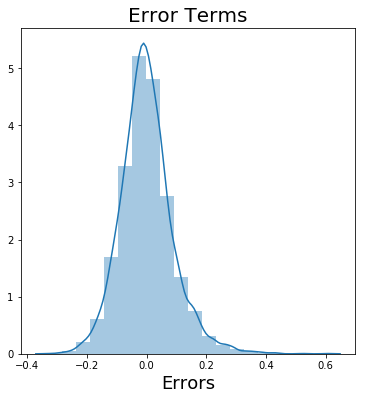

In [70]:
plt.figure(figsize= (6,6))
sns.distplot((y_train - y_train_price), bins = 20)
plt.title('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Making Predictions

Applying the scaling on the test sets

In [71]:
list_2 =['Item_Weight','Item_Visibility','Item_MRP','Outlet_Years', 'Item_Outlet_Sales']

df_test[list_2]= scaler.transform(df_test[list_2])

df_test.head()

C:\Users\shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shubh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
3454,0.961298,0.523059,0.645869,0.336530,0.916667,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3386,0.571301,0.100444,0.955025,0.368612,0.083333,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
235,0.494352,0.125965,0.685623,0.173110,1.000000,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7201,0.845192,0.153557,0.325567,0.079057,0.083333,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
7782,0.508782,0.127913,0.632297,0.177140,0.500000,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0


#### Dividing into X_test and y_test

In [72]:
y_test= df_test.pop('Item_Outlet_Sales')
X_test= df_test

In [73]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [74]:
# Making predictions
y_pred = lr_5.predict(X_test_new)

### Model Evaluation

<function matplotlib.pyplot.show(*args, **kw)>

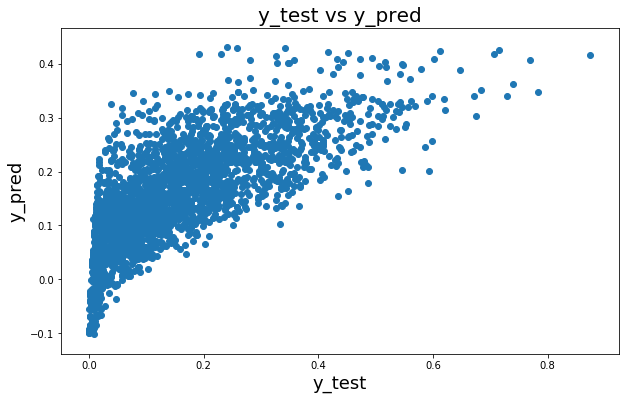

In [75]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=18)    
plt.show

##### We can see that the equation of our best fitted line is:

$ Item Outlet Sales = 0.0172+ 0.2819  \times  Item MRP - 0.1118  \times  Outlet Years -0.0736 \times Outlet Size Small + 0.1272 \times Outlet Type Supermarket Type1 - 0.0140 \times Outlet 2 + 0.0624 \times Outlet 4 + 0.2488 \times Outlet 5 + 0.0255 \times Outlet 8 - 0.05 \times Outlet 9  $